# BANK DATA

# Data Diagnosis
Data Insepction (shape, info, describe, data types)
Check Percentage of missing values in each column
Check for duplicates
Distribution(visuals)
Check column names
Correlation

In [3]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix  # Updated import path

# Statistical Tools
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

from scipy import stats

# Feature Selection
from sklearn.feature_selection import mutual_info_classif

# Preprocessing and Splitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Optional: PCA (if dimensionality reduction is needed)
from sklearn.decomposition import PCA


In [4]:
#loading data
bank_dataset = pd.read_csv("bank-full.csv")
bank_dataset

,AGE,JOB,MARITAL_STATUS,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,OUTCOME,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Making a copy of the original Data Set
dataset=bank_dataset.copy()

In [6]:
dataset.dtypes

AGE                int64
JOB               object
MARITAL_STATUS    object
EDUCATION         object
DEFAULT           object
BALANCE            int64
HOUSING           object
LOAN              object
CONTACT           object
DAY                int64
MONTH             object
DURATION           int64
CAMPAIGN           int64
PDAYS              int64
PREVIOUS           int64
OUTCOME           object
Y                 object
dtype: object

In [7]:
#Information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             45211 non-null  int64 
 1   JOB             45211 non-null  object
 2   MARITAL_STATUS  45211 non-null  object
 3   EDUCATION       45211 non-null  object
 4   DEFAULT         45211 non-null  object
 5   BALANCE         45211 non-null  int64 
 6   HOUSING         45211 non-null  object
 7   LOAN            45211 non-null  object
 8   CONTACT         45211 non-null  object
 9   DAY             45211 non-null  int64 
 10  MONTH           45211 non-null  object
 11  DURATION        45211 non-null  int64 
 12  CAMPAIGN        45211 non-null  int64 
 13  PDAYS           45211 non-null  int64 
 14  PREVIOUS        45211 non-null  int64 
 15  OUTCOME         45211 non-null  object
 16  Y               45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#check for any missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

AGE               0
JOB               0
MARITAL_STATUS    0
EDUCATION         0
DEFAULT           0
BALANCE           0
HOUSING           0
LOAN              0
CONTACT           0
DAY               0
MONTH             0
DURATION          0
CAMPAIGN          0
PDAYS             0
PREVIOUS          0
OUTCOME           0
Y                 0
dtype: int64

In [9]:
dataset.nunique()

AGE                 77
JOB                 12
MARITAL_STATUS       3
EDUCATION            4
DEFAULT              2
BALANCE           7168
HOUSING              2
LOAN                 2
CONTACT              3
DAY                 31
MONTH               12
DURATION          1573
CAMPAIGN            48
PDAYS              559
PREVIOUS            41
OUTCOME              4
Y                    2
dtype: int64

In [10]:
dataset.shape

(45211, 17)

In [11]:
#describing dataset
dataset.describe()

,AGE,BALANCE,DAY,DURATION,CAMPAIGN,PDAYS,PREVIOUS
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000




## Variable-Level Analysis and Business Recommendations

### AGE

**Analysis**
The average age of clients is around 41 years, with a range spanning from 18 to 95 years. This wide age range suggests that clients span multiple life stages, from early adulthood to retirement. The age variable likely has a nonlinear relationship with subscription likelihood, where middle-aged and older individuals may have a higher propensity to subscribe due to increased financial stability and long-term planning behavior.

**Recommendations**
Segment clients by age brackets (e.g., 18–30, 31–45, 46–60, 60+) and tailor marketing campaigns accordingly. For example, younger clients might be more responsive to content emphasizing long-term financial growth, while older clients may respond better to messages around security and fixed income bits.

---

### BALANCE

**Analysis**
The average balance is approximately €1239, but the presence of negative values and high variability (balance ranges from -8019 to 19985) indicates considerable financial diversity among clients. A higher average balance is typically a positive indicator of financial capacity and potential interest in investment products such as term deposits.

**Recommendations**
Prioritize clients with higher account balances for marketing campaigns. For clients with low or negative balances, consider offering financial literacy content or other bank products that may help improve their financial standing before re-engaging them for term deposit offers.

---

### DAY

**Analysis**
This represents the last day of contact during the month, ranging from day 1 to 31. By itself, this variable has limited predictive value, but it may become more meaningful if used in combination with other time-based features (such as the day of the week or campaign duration).

**Recommendations**
Analyze whether contact timing within the month affects conversion. If certain time windows (e.g., beginning vs. end of month) lead to higher subscription rates, restructure campaign schedules to align with these high-performing periods.

---

### DURATION

**Analysis**
Call duration shows a strong relationship with the likelihood of subscription. Longer calls typically indicate greater interest or engagement, while very short calls, especially those with a duration of zero, likely reflect failed or dropped calls. Since this variable is often highly correlated with the target variable, using it in predictive modeling should be done with caution to avoid data leakage.

**Recommendations**
Focus on improving call quality and engagement during the first few minutes, as that’s where the conversion decision often begins. Calls with very short duration should be flagged and potentially excluded from performance evaluation metrics, or followed up with improved engagement strategies.

---

### CAMPAIGN

**Analysis**
This variable indicates the number of times a client was contacted during the campaign period. Most clients were contacted fewer than 4 times, but some up to 20 times. Over-contacting clients can lead to fatigue or annoyance, thereby reducing conversion effectiveness.

**Recommendations**
Limit the number of follow-up attempts. Develop a rule-based approach informed by historical response rates, where, for instance, clients not responding after three contacts are deprioritized or handled differently (e.g., sent an email or SMS rather than called again).

---

### PDAYS

**Analysis**
This variable represents the number of days since the client was last contacted in a previous campaign. A value of -1 indicates the client was not previously contacted. The majority of clients fall into this category. For clients who have been previously contacted, lower values may indicate recency and potential for positive engagement.

**Recommendations**
Differentiate marketing approaches for new vs. previously contacted clients. For previously contacted clients, consider their past engagement outcomes and use that history to inform whether a follow-up is warranted. For example, clients contacted within the past 30–60 days may respond better to a personalized or reminder-based approach.

---

### PREVIOUS

**Analysis**
This feature captures the number of prior contacts with the client before the current campaign. The majority of clients had no prior contact, but there are cases of repeated engagement up to 15 times. While repeated contact may help in building familiarity, it can also be perceived as intrusive if not managed properly.

**Recommendations**
Introduce a feedback mechanism to assess why a client didn’t respond in previous contacts and adjust the messaging accordingly. For clients with multiple contacts but no conversion, switch to passive communication channels or delay future engagement to avoid overexposure.

---

## Overall Strategic Recommendations

1. **Target High-Probability Clients More Efficiently**
   Use historical data (e.g., high balance, middle-age group, positive past interactions) to prioritize clients with a higher likelihood of subscribing. Allocate more resources to these segments.

2. **Reduce Client Fatigue from Over-Contacting**
   Develop contact thresholds beyond which clients are temporarily removed from the campaign pool unless they initiate contact. Repeated contacts should be balanced with customer tolerance and privacy.

3. **Time Campaigns Strategically**
   Explore performance differences based on the time of month or week. If analysis reveals stronger conversion rates at certain times, realign marketing schedules accordingly.

4. **Refine Product Education and Messaging**
   Clients with lower balances or younger age groups may not fully understand the benefits of term deposits. Provide educational material that breaks down long-term advantages in simple terms.

5. **Reengage Based on Past Behavior**
   Use PDAYS and PREVIOUS to tailor re-engagement strategies. Clients who responded positively in the past should be followed up with personalized offers, while clients who never responded can be deprioritized.

6. **Monitor and Improve Call Quality**
   Encourage sales agents to maintain optimal call lengths. Use training and scripts to ensure that earyou’d like these recommendations formatted into a presentation or report template for submission.
using outreach efforts based on meaningful features like `AGE`, `BALANCE`, `PDAYS`, and `CAMPAIGN`, the bank can **maximize ROI** from term deposit marketing efforts.



In [13]:
# Target variable distribution
count = dataset.groupby('Y').size()
percent = count/len(dataset)*100
print(percent)

Y
no     88.30152
yes    11.69848
dtype: float64


## Analysis of Indepedent Numerical Variables

We have to check the distribution to understand the structure and patterns of the data. The distribution might reveal skewness or outliers that might affect the statistical test and model accuracy. This informs our choice of analysis methods.

Outliers can be defined as values out of range [(Q1-1.5*IQR) , (Q3+1.5*IQR)] but here I choose a range based on Maximum and Minimum value for each variable selected by observing Boxplot of corresponding variable.

After identification, Outlier values will be imputed by "mean" of respective variable by implementation of "impute_outliers" function.


In [16]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

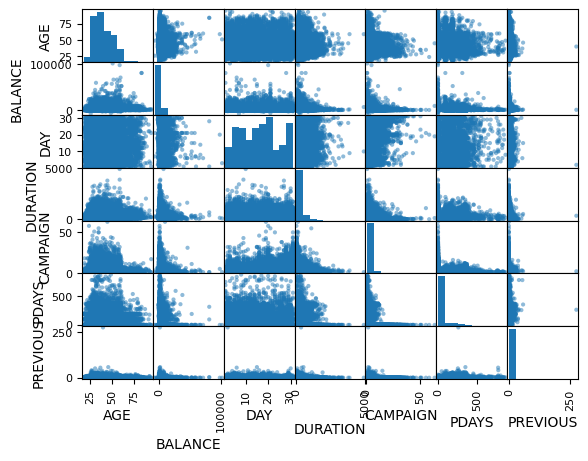

In [18]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).

Lets analyze all Independent Numerical variables against Target variable 'is_success' by plotting Boxplot. We can easily find outliers through Boxplot.

## AGE

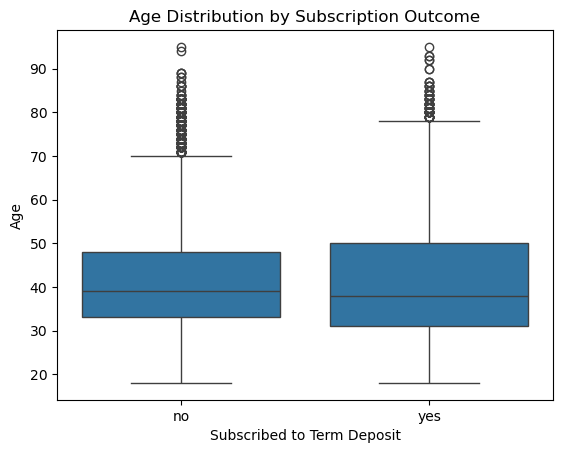

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of age by subscription outcome
sns.boxplot(x='Y', y='AGE', data=dataset)
plt.title('Age Distribution by Subscription Outcome')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Age')
plt.show()


# Balance

<Axes: xlabel='Y', ylabel='BALANCE'>

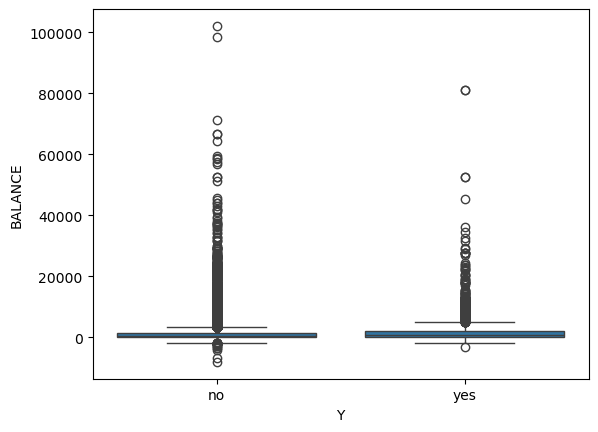

In [24]:
sns.boxplot(x="Y", y='BALANCE', data=dataset)

In [25]:
# Fixing balance column
dataset_new = dataset
min_val = dataset_new["BALANCE"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='BALANCE' , minimum=min_val, maximum=max_val)

# DURATION

<Axes: xlabel='Y', ylabel='DURATION'>

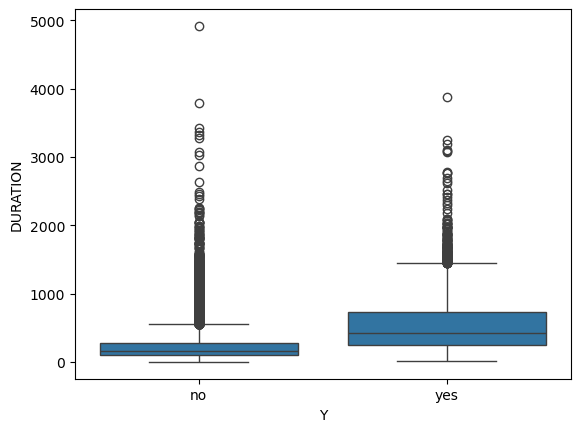

In [27]:
sns.boxplot(x="Y", y='DURATION', data=dataset)

In [28]:
# Fixing duration column
min_val = dataset_new["DURATION"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='DURATION' , minimum=min_val, maximum=max_val)

### CAMPAIGN

<Axes: xlabel='Y', ylabel='CAMPAIGN'>

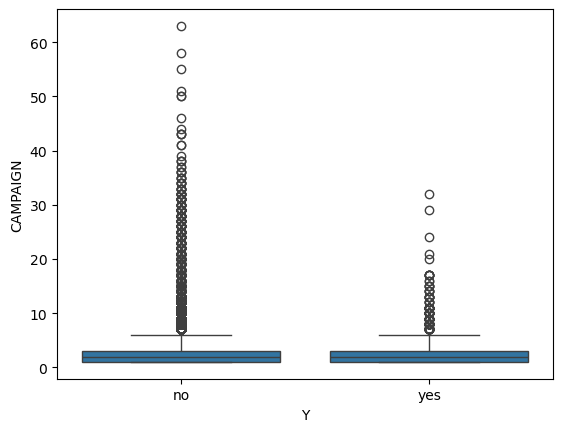

In [30]:
sns.boxplot(x="Y", y='CAMPAIGN', data=dataset)

In [31]:
# Fixing campaign column
min_val = dataset_new["CAMPAIGN"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='CAMPAIGN' , minimum=min_val, maximum=max_val)

#### PDAYS

<Axes: xlabel='Y', ylabel='PDAYS'>

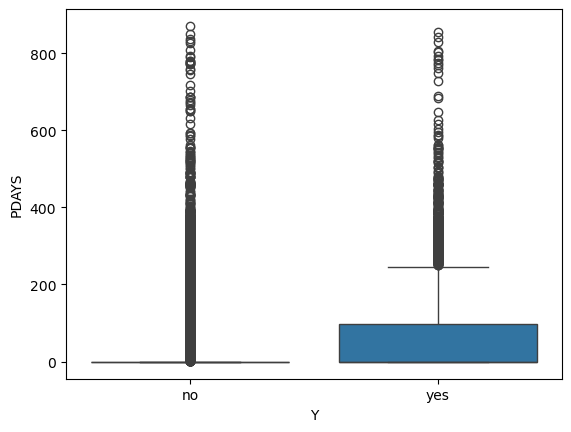

In [33]:
sns.boxplot(x="Y", y='PDAYS', data=dataset)

In [34]:
# Fixing pdays column
min_val = dataset_new["PDAYS"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='PDAYS' , minimum=min_val, maximum=max_val)

### PREVIOUS

<Axes: xlabel='Y', ylabel='PREVIOUS'>

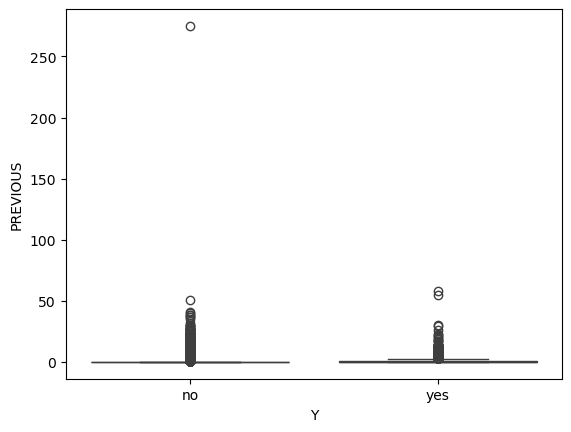

In [36]:
sns.boxplot(x="Y", y='PREVIOUS', data=dataset)

In [37]:
# Fixing 'previous' column
min_val = dataset_new["PREVIOUS"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='PREVIOUS' , minimum=min_val, maximum=max_val)

In [38]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,AGE,BALANCE,DAY,DURATION,CAMPAIGN,PDAYS,PREVIOUS
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


## Analysis of Indepedent Categorical Variables

### Note: 
### 1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
### 2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

In [41]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

### JOB

JOB
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


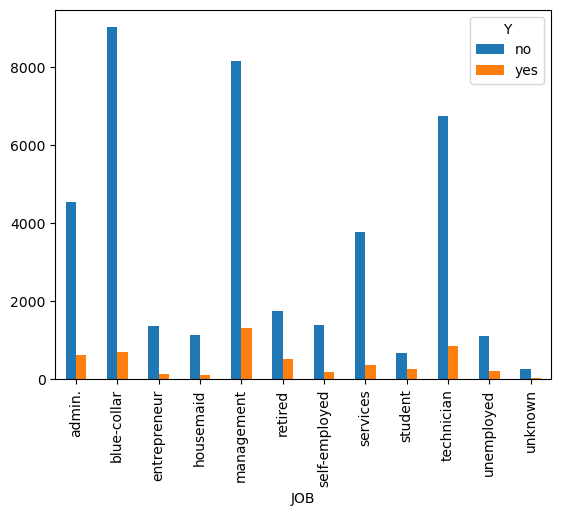

In [43]:
# job
temp1 = pd.crosstab(dataset['JOB'], dataset['Y'])
temp1.plot(kind='bar')
print(dataset.groupby(['JOB']).size()/len(dataset)*100) 

In [44]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='JOB')

### MARITAL_STATUS

MARITAL_STATUS
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


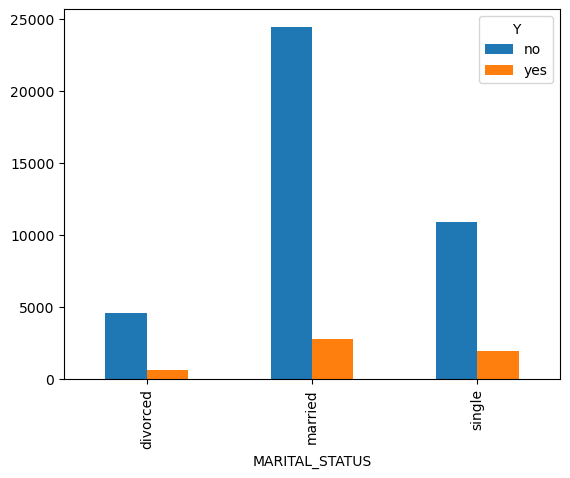

In [46]:
# marital
temp2 = pd.crosstab(dataset['MARITAL_STATUS'], dataset['Y'])
temp2.plot(kind='bar')
print(dataset.groupby(['MARITAL_STATUS']).size()/len(dataset)*100) 

### EDUCATION

EDUCATION
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


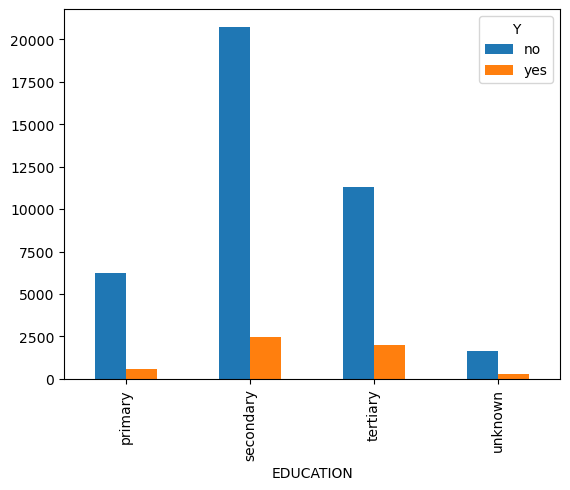

In [48]:
# EDUCATION
temp3 = pd.crosstab(dataset['EDUCATION'], dataset['Y'])
temp3.plot(kind='bar')
print(dataset.groupby(['EDUCATION']).size()/len(dataset)*100) 

In [49]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='EDUCATION')

### DEFAULT

DEFAULT
no     98.197341
yes     1.802659
dtype: float64


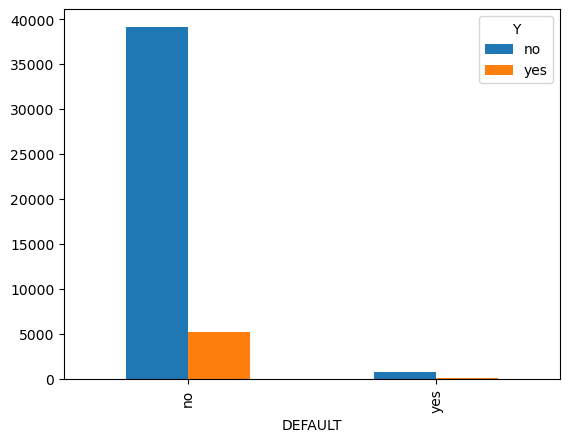

In [51]:
# DEFAULT
temp4 = pd.crosstab(dataset['DEFAULT'], dataset['Y'])
temp4.plot(kind='bar')
print(dataset.groupby(['DEFAULT']).size()/len(dataset)*100) 

#### This variable seems highly unbalanced (skewed) so we can drop this.

In [53]:
#dropping variable 'default'
del dataset_new['DEFAULT']

### HOUSING

HOUSING
no     44.416182
yes    55.583818
dtype: float64


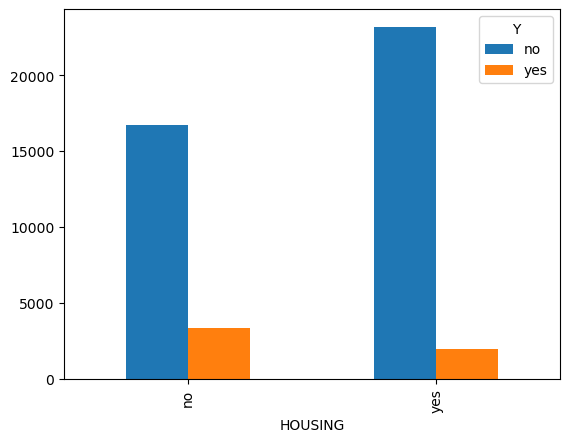

In [55]:
# HOUSING
temp5 = pd.crosstab(dataset['HOUSING'], dataset['Y'])
temp5.plot(kind='bar')
print(dataset.groupby(['HOUSING']).size()/len(dataset)*100) 

### CONTACT

CONTACT
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


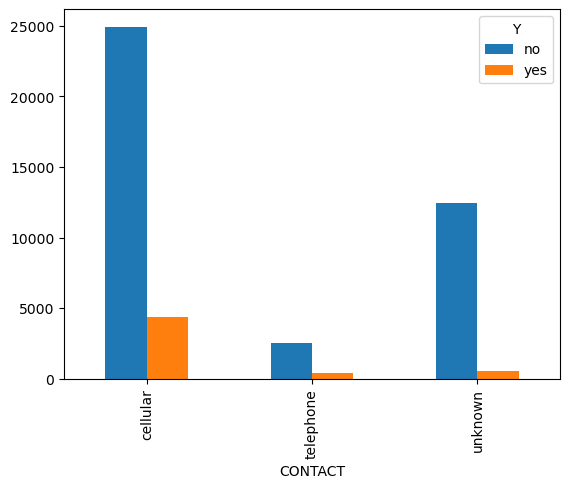

In [57]:
# CONTACT
temp6 = pd.crosstab(dataset['CONTACT'], dataset['Y'])
temp6.plot(kind='bar')
print(dataset.groupby(['CONTACT']).size()/len(dataset)*100) 

### MONTH

MONTH
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


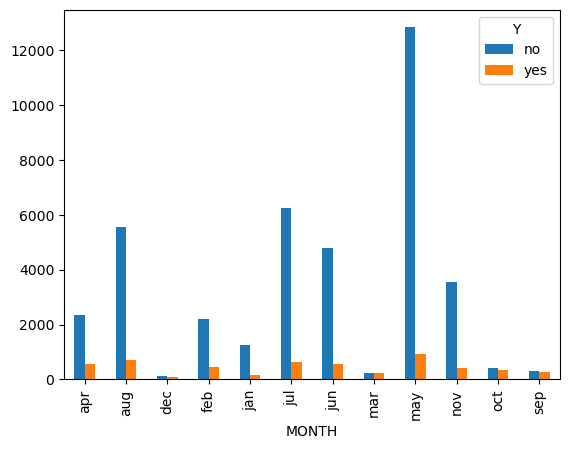

In [59]:
# MONTH
temp7 = pd.crosstab(dataset['MONTH'], dataset['Y'])
temp7.plot(kind='bar')
print(dataset.groupby(['MONTH']).size()/len(dataset)*100) 

### OUTCOME

OUTCOME
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


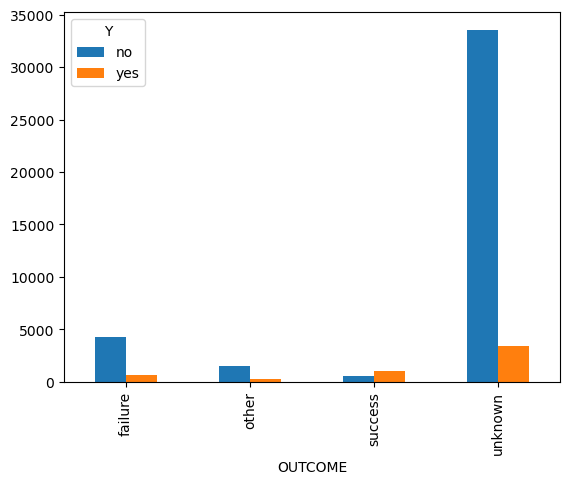

In [61]:
# OUTCOME
temp8 = pd.crosstab(dataset['OUTCOME'], dataset['Y'])
temp8.plot(kind='bar')
print(dataset.groupby(['OUTCOME']).size()/len(dataset)*100) 

### OUTCOME also has more than 81% missing values so we can drop this variable also.

In [63]:
#dropping variable 'OUTCOME'
del dataset_new['OUTCOME']

### LOAN

LOAN
no     83.977351
yes    16.022649
dtype: float64


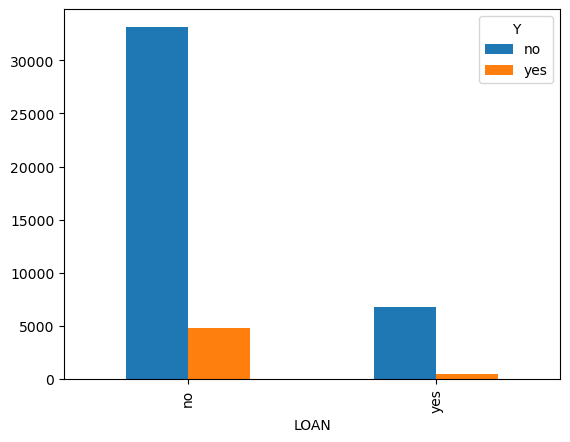

In [65]:
# LOAN
temp9 = pd.crosstab(dataset['LOAN'], dataset['Y'])
temp9.plot(kind='bar')
print(dataset.groupby(['LOAN']).size()/len(dataset)*100) 

### Updated Dataset after Exploratary Data Analysis:

In [67]:
#describing dataset
dataset.describe()

,AGE,BALANCE,DAY,DURATION,CAMPAIGN,PDAYS,PREVIOUS
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


In [68]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             45211 non-null  int64  
 1   JOB             45211 non-null  object 
 2   MARITAL_STATUS  45211 non-null  object 
 3   EDUCATION       45211 non-null  object 
 4   BALANCE         45211 non-null  float64
 5   HOUSING         45211 non-null  object 
 6   LOAN            45211 non-null  object 
 7   CONTACT         45211 non-null  object 
 8   DAY             45211 non-null  int64  
 9   MONTH           45211 non-null  object 
 10  DURATION        45211 non-null  float64
 11  CAMPAIGN        45211 non-null  float64
 12  PDAYS           45211 non-null  float64
 13  PREVIOUS        45211 non-null  float64
 14  Y               45211 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.2+ MB


In [69]:
dataset_new.describe

<bound method NDFrame.describe of        AGE           JOB MARITAL_STATUS  EDUCATION  BALANCE HOUSING LOAN  \
0       58    management        married   tertiary   2143.0     yes   no   
1       44    technician         single  secondary     29.0     yes   no   
2       33  entrepreneur        married  secondary      2.0     yes  yes   
3       47   blue-collar        married  secondary   1506.0     yes   no   
4       33   blue-collar         single  secondary      1.0      no   no   
...    ...           ...            ...        ...      ...     ...  ...   
45206   51    technician        married   tertiary    825.0      no   no   
45207   71       retired       divorced    primary   1729.0      no   no   
45208   72       retired        married  secondary   5715.0      no   no   
45209   57   blue-collar        married  secondary    668.0      no   no   
45210   37  entrepreneur        married  secondary   2971.0      no   no   

         CONTACT  DAY MONTH  DURATION  CAMPAIGN  PDAY

In [70]:
dataset_new.nunique()

AGE                 77
JOB                 11
MARITAL_STATUS       3
EDUCATION            3
BALANCE           7001
HOUSING              2
LOAN                 2
CONTACT              3
DAY                 31
MONTH               12
DURATION          1517
CAMPAIGN            21
PDAYS              249
PREVIOUS            17
Y                    2
dtype: int64

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             45211 non-null  int64  
 1   JOB             45211 non-null  object 
 2   MARITAL_STATUS  45211 non-null  object 
 3   EDUCATION       45211 non-null  object 
 4   BALANCE         45211 non-null  float64
 5   HOUSING         45211 non-null  object 
 6   LOAN            45211 non-null  object 
 7   CONTACT         45211 non-null  object 
 8   DAY             45211 non-null  int64  
 9   MONTH           45211 non-null  object 
 10  DURATION        45211 non-null  float64
 11  CAMPAIGN        45211 non-null  float64
 12  PDAYS           45211 non-null  float64
 13  PREVIOUS        45211 non-null  float64
 14  Y               45211 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.2+ MB


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## FEATURE ENGINEERING AND MODEL TRAINING

In [74]:
# X = Features, y = Target
X = dataset_new.drop("Y", axis=1)
y = dataset_new["Y"].map({"yes": 1, "no": 0})  # Convert target to numeric


In [75]:
categorical_features = ['JOB', 'MARITAL_STATUS', 'EDUCATION', 'HOUSING', 'LOAN', 'CONTACT', 'MONTH']
numerical_features = ['AGE', 'BALANCE', 'DAY', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS']


In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [77]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])




In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [79]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE', 'BALANCE', 'DAY',
                                                   'DURATION', 'CAMPAIGN',
                                                   'PDAYS', 'PREVIOUS']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['JOB', 'MARITAL_STATUS',
                                                   'EDUCATION', 'HOUSING',
                                                   'LOAN', 'CONTACT',
                                                   'MONTH'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [80]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[7748  237]
 [ 657  401]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.63      0.38      0.47      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



In [81]:
dataset_new['Y'].value_counts()

Y
no     39922
yes     5289
Name: count, dtype: int64

### Using SMOTE (Oversampling Minority Class)

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix





In [84]:
# Fit and transform training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [85]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

# Check new balance
print(pd.Series(y_train_bal).value_counts())


Y
0    31937
1    31937
Name: count, dtype: int64


In [86]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [87]:
y_pred = clf.predict(X_test_encoded)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7530  455]
 [ 456  602]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.57      0.57      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043



In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=(len(y_train_bal) / sum(y_train_bal == 1)),  # balance class 1
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_bal, y_train_bal)

y_pred_xgb = xgb.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\kpbon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[7365  620]
 [ 339  719]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7985
           1       0.54      0.68      0.60      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.80      0.77      9043
weighted avg       0.91      0.89      0.90      9043



In [89]:
y_probs = clf.predict_proba(X_test_encoded)[:, 1]  # Get probabilities for class 1

# Adjust threshold (e.g., from 0.5 to 0.3)
y_pred_thresh = (y_probs >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[6974 1011]
 [ 178  880]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7985
           1       0.47      0.83      0.60      1058

    accuracy                           0.87      9043
   macro avg       0.72      0.85      0.76      9043
weighted avg       0.92      0.87      0.88      9043



In [90]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('rf', clf),
    ('xgb', xgb)
], voting='soft')

ensemble.fit(X_train_bal, y_train_bal)
y_pred_ens = ensemble.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens))


C:\Users\kpbon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:30:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[7440  545]
 [ 366  692]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7985
           1       0.56      0.65      0.60      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.79      0.77      9043
weighted avg       0.91      0.90      0.90      9043



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_bal, y_train_bal)

# Best model
best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)

# Evaluate
y_pred_rf = best_rf.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
